# Assignment 3 - Mini Project One

### New York City Taxi fare prediction

## Hao Wu - 001443861

### Abstract
This notebook will cover the Data visualization to the Taxi fare in New York City. For data visualization tools, I'll use the basic graph to draw a "Heatmap" to show the distribution of some data in this set. And I'll use Keras Deep learning to do prediction to finish this competition.

### Dataset Information
**Link**
Kaggle competition:https://www.kaggle.com/c/new-york-city-taxi-fare-prediction

**File descriptions**\
train.csv - Input features and target fare_amount values for the training set (about 55M rows).
test.csv - Input features for the test set (about 10K rows). Your goal is to predict fare_amount for each row.
sample_submission.csv - a sample submission file in the correct format (columns key and fare_amount). This file 'predicts' fare_amount to be 11.35USD for all rows, which is the mean fare_amount from the training set.\
**Data fields**\
ID
key - Unique string identifying each row in both the training and test sets. Comprised of pickup_datetime plus a unique integer, but this doesn't matter, it should just be used as a unique ID field. Required in your submission CSV. Not necessarily needed in the training set, but could be useful to simulate a 'submission file' while doing cross-validation within the training set.\
Features\
pickup_datetime - timestamp value indicating when the taxi ride started.\
pickup_longitude - float for longitude coordinate of where the taxi ride started.\
pickup_latitude - float for latitude coordinate of where the taxi ride started.\
dropoff_longitude - float for longitude coordinate of where the taxi ride ended.\
dropoff_latitude - float for latitude coordinate of where the taxi ride ended.\
passenger_count - integer indicating the number of passengers in the taxi ride.\
**Target**\
fare_amount - float dollar amount of the cost of the taxi ride. This value is only in the training set; this is what you are predicting in the test set and it is required in your submission CSV.

#### Abstract
In this playground competition, hosted in partnership with Google Cloud and Coursera, you are tasked with predicting the fare amount (inclusive of tolls) for a taxi ride in New York City given the pickup and dropoff locations. While you can get a basic estimate based on just the distance between the two points, this will result in an RMSE of $5-$8, depending on the model used .
This notebook will focus on data visualization and prediction model based on Deep learning instead of basic machine learning regression model.
I'll use the Keras deep learning model to do prediction.

**Import required modules and libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from datetime import datetime
import calendar
from math import sin, cos, sqrt, atan2, radians,asin
import folium
from folium import FeatureGroup, LayerControl, Map, Marker
from folium.plugins import HeatMap
from folium.plugins import TimestampedGeoJson
from folium.plugins import MarkerCluster
from geopy.distance import great_circle
import matplotlib.dates as mdates
import matplotlib as mpl
from datetime import timedelta
import datetime as dt
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', -1)
plt.style.use('fivethirtyeight')
import folium
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import pickle
from geopy.distance import geodesic

In [2]:
datatypes = {'key': 'str', 
              'fare_amount': 'float32',
              'pickup_datetime': 'str', 
              'pickup_longitude': 'float32',
              'pickup_latitude': 'float32',
              'dropoff_longitude': 'float32',
              'dropoff_latitude': 'float32',
              'passenger_count': 'uint8'}

train=pd.read_csv("train.csv",dtype = datatypes,nrows=10000000)
train.head()

key  fare_amount          pickup_datetime  \
0  2009-06-15 17:26:21.0000001    4.5          2009-06-15 17:26:21 UTC   
1  2010-01-05 16:52:16.0000002    16.9         2010-01-05 16:52:16 UTC   
2  2011-08-18 00:35:00.00000049   5.7          2011-08-18 00:35:00 UTC   
3  2012-04-21 04:30:42.0000001    7.7          2012-04-21 04:30:42 UTC   
4  2010-03-09 07:51:00.000000135  5.3          2010-03-09 07:51:00 UTC   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0 -73.844315         40.721317       -73.841614          40.712276          
1 -74.016045         40.711304       -73.979271          40.782005          
2 -73.982735         40.761269       -73.991241          40.750561          
3 -73.987129         40.733143       -73.991570          40.758091          
4 -73.968094         40.768009       -73.956657          40.783764          

   passenger_count  
0  1                
1  1                
2  2                
3  1                
4  1

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 8 columns):
key                  object
fare_amount          float32
pickup_datetime      object
pickup_longitude     float32
pickup_latitude      float32
dropoff_longitude    float32
dropoff_latitude     float32
passenger_count      uint8
dtypes: float32(5), object(2), uint8(1)
memory usage: 352.9+ MB


In [4]:
# Convert pickup_datetime from Object to Datetime object
train['pickup_datetime']=pd.to_datetime(train['pickup_datetime'],format='%Y-%m-%d %H:%M:%S UTC')
train.head()

key  fare_amount     pickup_datetime  \
0  2009-06-15 17:26:21.0000001    4.5         2009-06-15 17:26:21   
1  2010-01-05 16:52:16.0000002    16.9        2010-01-05 16:52:16   
2  2011-08-18 00:35:00.00000049   5.7         2011-08-18 00:35:00   
3  2012-04-21 04:30:42.0000001    7.7         2012-04-21 04:30:42   
4  2010-03-09 07:51:00.000000135  5.3         2010-03-09 07:51:00   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0 -73.844315         40.721317       -73.841614          40.712276          
1 -74.016045         40.711304       -73.979271          40.782005          
2 -73.982735         40.761269       -73.991241          40.750561          
3 -73.987129         40.733143       -73.991570          40.758091          
4 -73.968094         40.768009       -73.956657          40.783764          

   passenger_count  
0  1                
1  1                
2  2                
3  1                
4  1

Create datetime features based on pickup_datetime
Remove the datapoint out of the NYC

In [5]:
train = train[(-76 <= train['pickup_longitude']) & (train['pickup_longitude'] <= -72)]
train = train[(-76 <= train['dropoff_longitude']) & (train['dropoff_longitude'] <= -72)]
train = train[(38 <= train['pickup_latitude']) & (train['pickup_latitude'] <= 42)]
train = train[(38 <= train['dropoff_latitude']) & (train['dropoff_latitude'] <= 42)]

train['pickup_date']= train['pickup_datetime'].dt.date
train['pickup_day']=train['pickup_datetime'].apply(lambda x:x.day)
train['pickup_hour']=train['pickup_datetime'].apply(lambda x:x.hour)
train['pickup_day_of_week']=train['pickup_datetime'].apply(lambda x:calendar.day_name[x.weekday()])
train['pickup_month']=train['pickup_datetime'].apply(lambda x:x.month)
train['pickup_year']=train['pickup_datetime'].apply(lambda x:x.year)
train['weekday'] = train['pickup_datetime'].apply(lambda x: x.weekday())


## Exploratory Data Analysis & Visulization
### Distribution of Trip Fare

Text(0.5, 1.0, 'Distribution of Trip Fare')

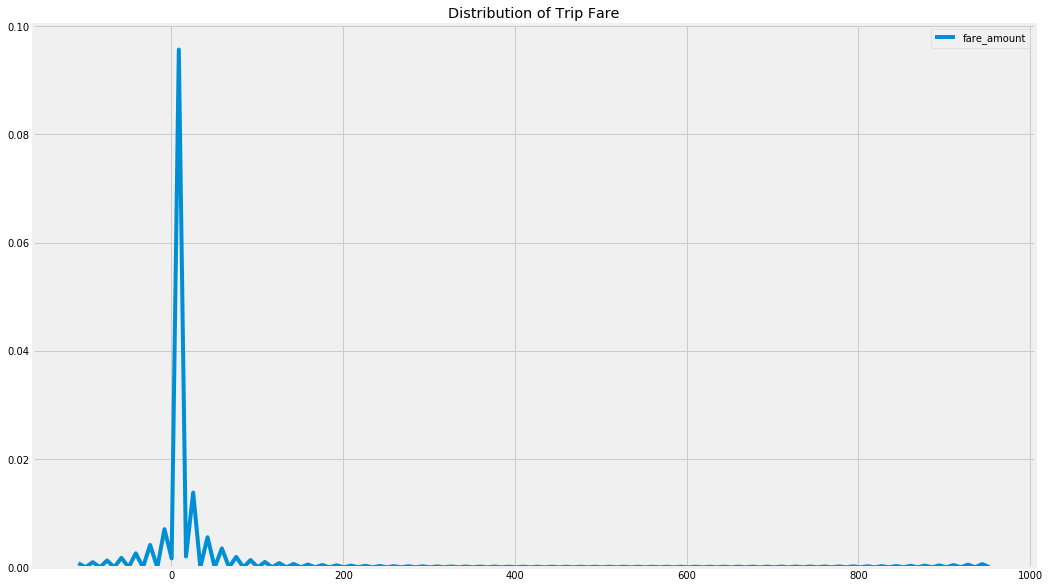

In [6]:
plt.figure(figsize=(16,10))
sns.kdeplot(train['fare_amount']).set_title("Distribution of Trip Fare")

In [7]:
# We will remove these records with negative fare from the data
train=train.loc[train['fare_amount']>=0]

Text(0.5, 1.0, 'Distribution of fare amount (log scale)')

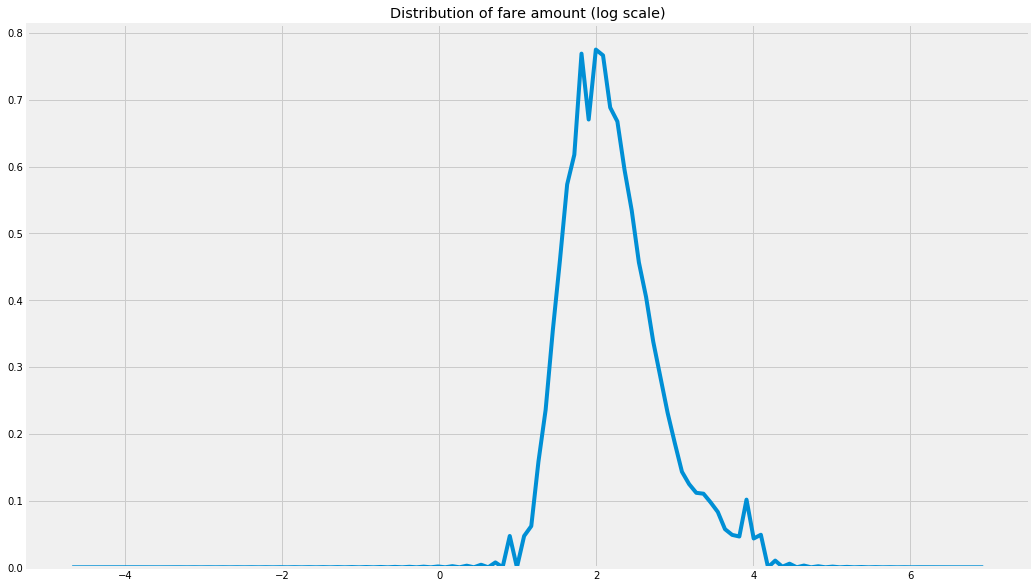

In [8]:
plt.figure(figsize=(16,10))
sns.kdeplot(np.log(train['fare_amount'].values)).set_title("Distribution of fare amount (log scale)")

The data is for Taxi Rides in Newyork, whose center lat, lng is at ((40,-74).The range of dropoff and pickup latitudes indicates lot of outlier locations in the train data.

In [58]:
print("Range of Pickup Latitude is ", (min(train['pickup_latitude']),max(train['pickup_latitude'])))
print("Range of Dropoff Latitude is ", (min(train['dropoff_latitude']),max(train['dropoff_latitude'])))


Range of Pickup Latitude is  (40.57325744628906, 41.70000076293945)
Range of Dropoff Latitude is  (40.57318878173828, 41.7063102722168)


In [10]:
test =  pd.read_csv('test.csv')
print("Longitude Boundary in test data")
min(test.pickup_longitude.min(), test.dropoff_longitude.min()),max(test.pickup_longitude.max(), test.dropoff_longitude.max())
print("Latitude Boundary in test data")
min(test.pickup_latitude.min(), test.pickup_latitude.min()),max(test.pickup_latitude.max(), test.pickup_latitude.max())


Longitude Boundary in test data
Latitude Boundary in test data


(40.573143, 41.709555)

In [11]:
boundary={'min_lng':-74.263242,
              'min_lat':40.573143,
              'max_lng':-72.986532, 
              'max_lat':41.709555}

In [12]:
train[(train.pickup_latitude==0) | (train.pickup_longitude)==0 | (train.dropoff_latitude==0)|(train.dropoff_longitude==0)].shape

(0, 15)

In [13]:
# Drop the outlier value
train.loc[~((train.pickup_longitude >= boundary['min_lng'] ) & (train.pickup_longitude <= boundary['max_lng']) &
            (train.pickup_latitude >= boundary['min_lat']) & (train.pickup_latitude <= boundary['max_lat']) &
            (train.dropoff_longitude >= boundary['min_lng']) & (train.dropoff_longitude <= boundary['max_lng']) &
            (train.dropoff_latitude >=boundary['min_lat']) & (train.dropoff_latitude <= boundary['max_lat'])),'is_outlier_loc']=1
train.loc[((train.pickup_longitude >= boundary['min_lng'] ) & (train.pickup_longitude <= boundary['max_lng']) &
            (train.pickup_latitude >= boundary['min_lat']) & (train.pickup_latitude <= boundary['max_lat']) &
            (train.dropoff_longitude >= boundary['min_lng']) & (train.dropoff_longitude <= boundary['max_lng']) &
            (train.dropoff_latitude >=boundary['min_lat']) & (train.dropoff_latitude <= boundary['max_lat'])),'is_outlier_loc']=0

print("Outlier vs Non Outlier Counts")
print(train['is_outlier_loc'].value_counts())

# Let us drop rows, where location is outlier
train=train.loc[train['is_outlier_loc']==0]
train.drop(['is_outlier_loc'],axis=1,inplace=True)

Outlier vs Non Outlier Counts
0.0    9784903
1.0    6308   
Name: is_outlier_loc, dtype: int64


## Location OverView

Location data
As we're dealing with location data, I want to plot the coordinates on a map. This gives a better view of the data. For this, I use the following website:

Easy to use map and GPS tool: https://www.gps-coordinates.net/
Calculate distance between locations: https://www.travelmath.com/flying-distance/
Open street map to grab using bouding box a map: https://www.openstreetmap.org/export#map=8/52.154/5.295
New York city coordinates are (https://www.travelmath.com/cities/New+York,+NY):

longitude = -74.0063889
lattitude = 40.7141667
I define a bounding box of interest by [long_min, long_max, latt_min, latt_max] using the minimum and maximum coordinates from the testset. This way, I'm sure to train a model for the full pickup/dropoff coordinate range of the test set.

From Open Street Map I grab a map and I drop any datapoint outside this box.

In [14]:
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)
BB = (-74.5, -72.8, 40.5, 41.8)
nyc_map = plt.imread('nyc_-74.5_-72.8_40.5_41.8.png',0)

# load extra image to zoom in on NYC
BB_zoom = (-74.3, -73.7, 40.5, 40.9)
nyc_map_zoom = plt.imread('nyc_-74.3_-73.7_40.5_40.9.png',0)

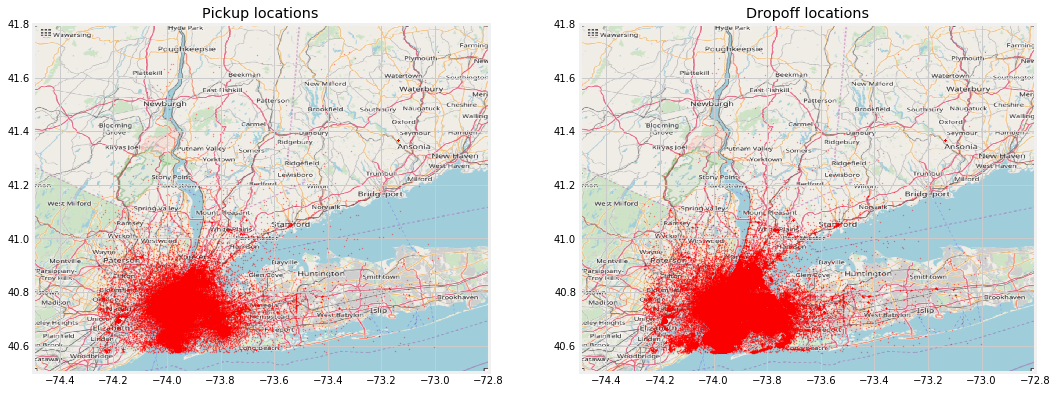

In [15]:
def plot_on_map(df, BB, nyc_map, s=10, alpha=0.2):
    fig, axs = plt.subplots(1, 2, figsize=(16,10))
    axs[0].scatter(df.pickup_longitude, df.pickup_latitude, zorder=1, alpha=alpha, c='r', s=s)
    axs[0].set_xlim((BB[0], BB[1]))
    axs[0].set_ylim((BB[2], BB[3]))
    axs[0].set_title('Pickup locations')
    axs[0].imshow(nyc_map, zorder=0, extent=BB)

    axs[1].scatter(df.dropoff_longitude, df.dropoff_latitude, zorder=1, alpha=alpha, c='r', s=s)
    axs[1].set_xlim((BB[0], BB[1]))
    axs[1].set_ylim((BB[2], BB[3]))
    axs[1].set_title('Dropoff locations')
    axs[1].imshow(nyc_map, zorder=0, extent=BB)
    

plot_on_map(train, BB, nyc_map, s=1, alpha=0.3)

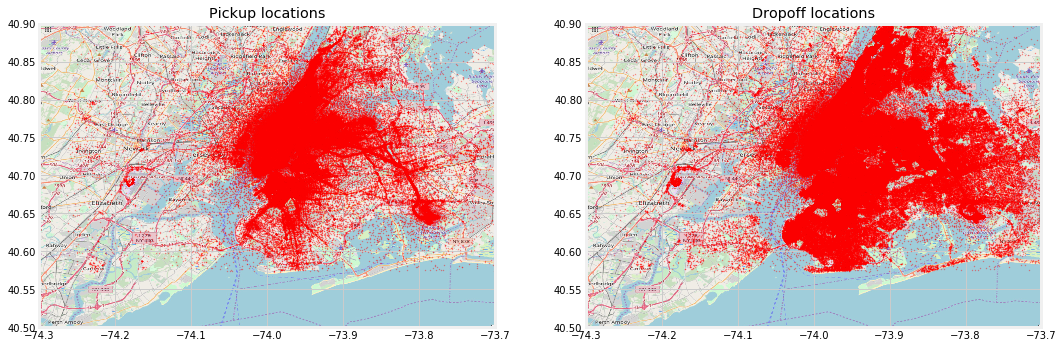

In [16]:
plot_on_map(train, BB_zoom, nyc_map_zoom, s=1, alpha=0.3)

Plot the test data

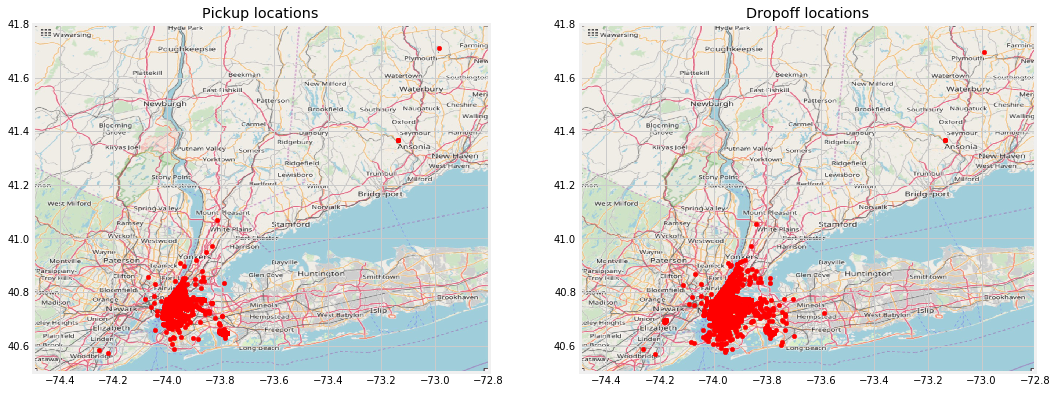

In [17]:
# plot test data on map
plot_on_map(test, BB, nyc_map, alpha=1.0, s=20)

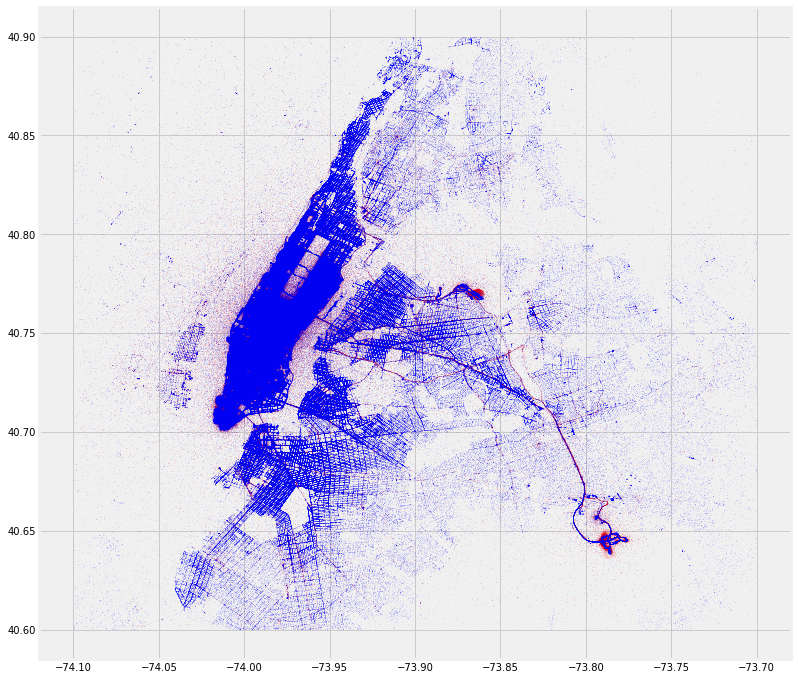

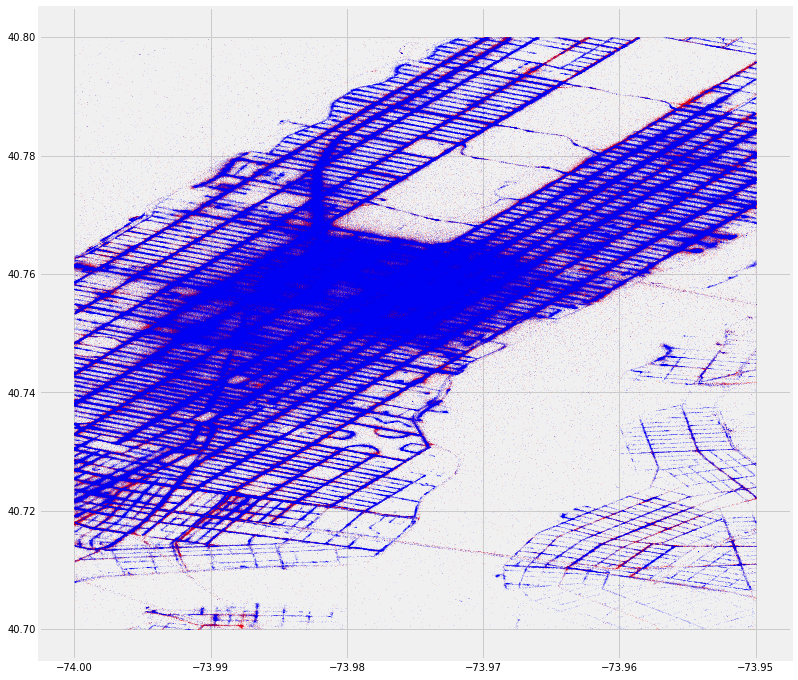

In [18]:
def select_within_boundingbox(df, BB):
    return (df.pickup_longitude >= BB[0]) & (df.pickup_longitude <= BB[1]) & \
           (df.pickup_latitude >= BB[2]) & (df.pickup_latitude <= BB[3]) & \
           (df.dropoff_longitude >= BB[0]) & (df.dropoff_longitude <= BB[1]) & \
           (df.dropoff_latitude >= BB[2]) & (df.dropoff_latitude <= BB[3])
def plot_hires(df, BB, figsize=(12, 12), ax=None, c=('r', 'b')):
    if ax == None:
        fig, ax = plt.subplots(1, 1, figsize=figsize)

    idx = select_within_boundingbox(df, BB)
    ax.scatter(df[idx].pickup_longitude, df[idx].pickup_latitude, c=c[0], s=0.01, alpha=0.5)
    ax.scatter(df[idx].dropoff_longitude, df[idx].dropoff_latitude, c=c[1], s=0.01, alpha=0.5)
plot_hires(train, (-74.1, -73.7, 40.6, 40.9))
plot_hires(train, (-74, -73.95, 40.7, 40.8))

### Plot Heatmap of Pickups and Dropoffs within NYC

(-74.03, -73.75)

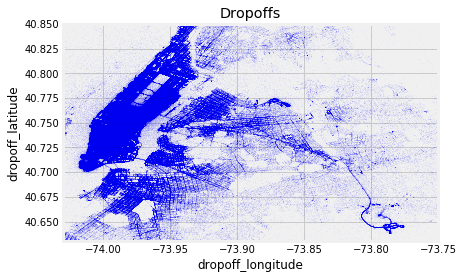

In [19]:


train.plot(kind='scatter', x='dropoff_longitude', y='dropoff_latitude',
                color='b', 
                s=.01, alpha=.2)
plt.title("Dropoffs")

plt.ylim(city_lat_border)
plt.xlim(city_long_border)

(-74.03, -73.75)

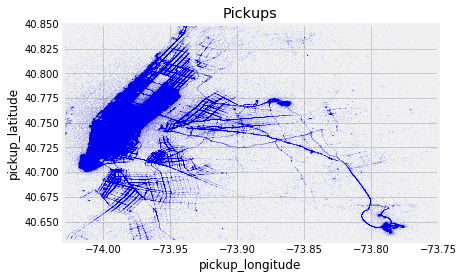

In [20]:
train.plot(kind='scatter', x='pickup_longitude', y='pickup_latitude',
                color='blue', 
                s=.01, alpha=.3)
plt.title("Pickups")

plt.ylim(city_lat_border)
plt.xlim(city_long_border)

### Heatmap based on fare amount across NYC

In [21]:
# Round pickup and dropoff latitude and longtitude to 3 decimal places
train['pickup_latitude_round3']=train['pickup_latitude'].apply(lambda x:round(x,3))
train['pickup_longitude_round3']=train['pickup_longitude'].apply(lambda x:round(x,3))
train['dropoff_latitude_round3']=train['dropoff_latitude'].apply(lambda x:round(x,3))
train['dropoff_longitude_round3']=train['dropoff_longitude'].apply(lambda x:round(x,3))

In [22]:
pickup_fare_amount=train.groupby(['pickup_latitude_round3','pickup_longitude_round3'])['fare_amount'].mean().reset_index().rename(columns={'fare_amount':'avg_fare'})
pickup_fare_amount.head()

pickup_latitude_round3  pickup_longitude_round3  avg_fare
0  40.573                 -74.228                   10.5    
1  40.573                 -73.990                   15.3    
2  40.573                 -73.983                   13.5    
3  40.574                 -74.243                   5.7     
4  40.574                 -74.224                   4.1

In the scatter plot, we saw the high density of pickups and dropoffs from and to JFK and La Guardia Airport

In [23]:
JFK={'min_lng':-73.8352,
     'min_lat':40.6195,
     'max_lng':-73.7401, 
     'max_lat':40.6659}
JFK_center=[40.6437,-73.7900]
# Get all pickups to JFK
JFK_data=train.loc[(train.pickup_latitude>=JFK['min_lat']) & (train.pickup_latitude<=JFK['max_lat'])]
JFK_data=JFK_data.loc[(train.pickup_longitude>=JFK['min_lng']) & (train.pickup_longitude<=JFK['max_lng'])]

print("Number of Trips with Pickups from JFK",JFK_data.shape[0])

JFK_dropoff=train.loc[(train.dropoff_latitude>=JFK['min_lat']) & (train.dropoff_latitude<=JFK['max_lat'])]
JFK_dropoff=JFK_dropoff.loc[(train.dropoff_longitude>=JFK['min_lng']) & (train.dropoff_longitude<=JFK['max_lng'])]

print("Number of Trips with Dropoffs to JFK",JFK_dropoff.shape[0])


Number of Trips with Pickups from JFK 150264
Number of Trips with Dropoffs to JFK 76120


#### Average Fare amount of trips from JFK

Text(0.5, 1.0, 'Fare Amount Distribution')

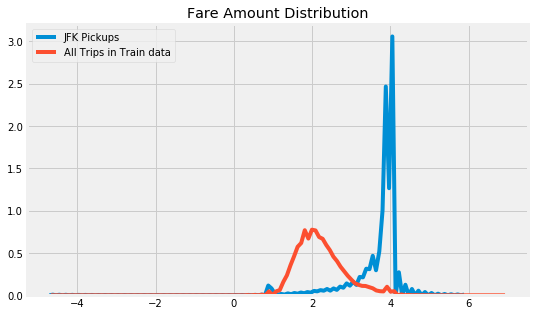

In [24]:
plt.figure(figsize=(8,5))
sns.kdeplot(np.log(JFK_data['fare_amount'].values),label='JFK Pickups')
#sns.kdeplot(np.log(JFK_dropoff['fare_amount'].values),label='JFK Dropoff')
sns.kdeplot(np.log(train['fare_amount'].values),label='All Trips in Train data')
plt.title("Fare Amount Distribution")

Text(0.5, 1.0, 'Dropoffs vs Fare Amount')

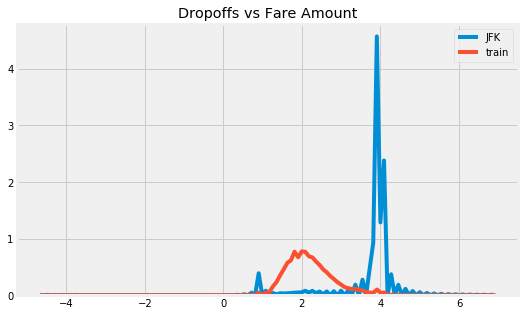

In [25]:
plt.figure(figsize=(8,5))
sns.kdeplot(np.log(JFK_dropoff['fare_amount'].values),label='JFK')
sns.kdeplot(np.log(train['fare_amount'].values),label='train')
plt.title("Dropoffs vs Fare Amount")

In [26]:
del JFK_data
del JFK
del JFK_dropoff

In [27]:
nyc_airports={'JFK':{'min_lng':-73.8352,
     'min_lat':40.6195,
     'max_lng':-73.7401, 
     'max_lat':40.6659},
              
    'EWR':{'min_lng':-74.1925,
            'min_lat':40.6700, 
            'max_lng':-74.1531, 
            'max_lat':40.7081

        },
    'LaGuardia':{'min_lng':-73.8895, 
                  'min_lat':40.7664, 
                  'max_lng':-73.8550, 
                  'max_lat':40.7931
        
    }
    
}
def isAirport(latitude,longitude,airport_name='JFK'):
    
    if latitude>=nyc_airports[airport_name]['min_lat'] and latitude<=nyc_airports[airport_name]['max_lat'] and longitude>=nyc_airports[airport_name]['min_lng'] and longitude<=nyc_airports[airport_name]['max_lng']:
        return 1
    else:
        return 0

In [28]:
train['is_pickup_JFK']=train.apply(lambda row:isAirport(row['pickup_latitude'],row['pickup_longitude'],'JFK'),axis=1)
train['is_dropoff_JFK']=train.apply(lambda row:isAirport(row['dropoff_latitude'],row['dropoff_longitude'],'JFK'),axis=1)

In [29]:
train['is_pickup_EWR']=train.apply(lambda row:isAirport(row['pickup_latitude'],row['pickup_longitude'],'EWR'),axis=1)
train['is_dropoff_EWR']=train.apply(lambda row:isAirport(row['dropoff_latitude'],row['dropoff_longitude'],'EWR'),axis=1)

In [30]:
train['is_pickup_la_guardia']=train.apply(lambda row:isAirport(row['pickup_latitude'],row['pickup_longitude'],'LaGuardia'),axis=1)
train['is_dropoff_la_guardia']=train.apply(lambda row:isAirport(row['dropoff_latitude'],row['dropoff_longitude'],'LaGuardia'),axis=1)

#### Distance


In [31]:
def distance(lat1, lat2, lon1,lon2):
    p = 0.017453292519943295 # Pi/180
    a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p)) / 2
    return 0.6213712 * 12742 * np.arcsin(np.sqrt(a))

In [32]:
train['trip_distance']=train.apply(lambda row:distance(row['pickup_latitude'],row['dropoff_latitude'],row['pickup_longitude'],row['dropoff_longitude']),axis=1)

Text(0.5, 1.0, 'Distribution of Trip Distance (log scale)')

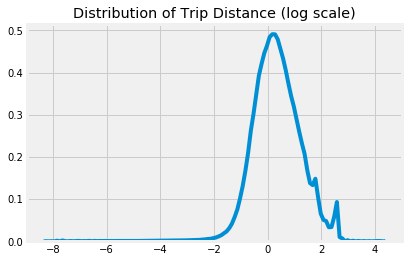

In [33]:
sns.kdeplot(np.log(train['trip_distance'].values)).set_title("Distribution of Trip Distance (log scale)")

In [34]:
non_airport=train.loc[(train['is_dropoff_JFK']==0) & (train['is_dropoff_EWR']==0) & (train['is_dropoff_la_guardia']==0)]
non_airport=non_airport.loc[(non_airport['is_pickup_JFK']==0) & (non_airport['is_pickup_EWR']==0) & (non_airport['is_pickup_la_guardia']==0)]
non_airport.shape

(9245458, 26)

In [35]:
non_airport_long_trips=non_airport[non_airport['trip_distance']>=50]

drop_map = folium.Map(location = [40.730610,-73.935242],zoom_start = 12,)
#print(pickup.shape)
### For each pickup point add a circlemarker

for index, row in non_airport_long_trips.iterrows():
    
    folium.CircleMarker([row['dropoff_latitude_round3'], row['dropoff_longitude_round3']],
                        radius=3,
                        
                        color="#008000", 
                        fill_opacity=0.9
                       ).add_to(drop_map)
for index, row in non_airport_long_trips.iterrows():
    
    folium.CircleMarker([row['pickup_latitude_round3'], row['pickup_longitude_round3']],
                        radius=3,
                        
                        color="blue", 
                        fill_opacity=0.9
                       ).add_to(drop_map)
    

drop_map

Most of the long trips dropoffs and pickups are in lower Manhattan. There are a lot of dropoffs in Brooklyn

New York city is divided into 7 Boroughs. Let us calculate which borough pickup and dropoff points are. And whether that effects the fare

In [36]:
nyc_boroughs={
    'manhattan':{
        'min_lng':-74.0479,
        'min_lat':40.6829,
        'max_lng':-73.9067,
        'max_lat':40.8820
    },
    
    'queens':{
        'min_lng':-73.9630,
        'min_lat':40.5431,
        'max_lng':-73.7004,
        'max_lat':40.8007

    },

    'brooklyn':{
        'min_lng':-74.0421,
        'min_lat':40.5707,
        'max_lng':-73.8334,
        'max_lat':40.7395

    },

    'bronx':{
        'min_lng':-73.9339,
        'min_lat':40.7855,
        'max_lng':-73.7654,
        'max_lat':40.9176

    },

    'staten_island':{
        'min_lng':-74.2558,
        'min_lat':40.4960,
        'max_lng':-74.0522,
        'max_lat':40.6490

    }
    
    
    
}

In [37]:
def getBorough(lat,lng):
    
    locs=nyc_boroughs.keys()
    for loc in locs:
        if lat>=nyc_boroughs[loc]['min_lat'] and lat<=nyc_boroughs[loc]['max_lat'] and lng>=nyc_boroughs[loc]['min_lng'] and lng<=nyc_boroughs[loc]['max_lng']:
            return loc
    return 'others'

In [38]:
train['pickup_borough']=train.apply(lambda row:getBorough(row['pickup_latitude'],row['pickup_longitude']),axis=1)
train['dropoff_borough']=train.apply(lambda row:getBorough(row['dropoff_latitude'],row['dropoff_longitude']),axis=1)

Text(0.5, 1.0, 'Distribution of Pickup Boroughs')

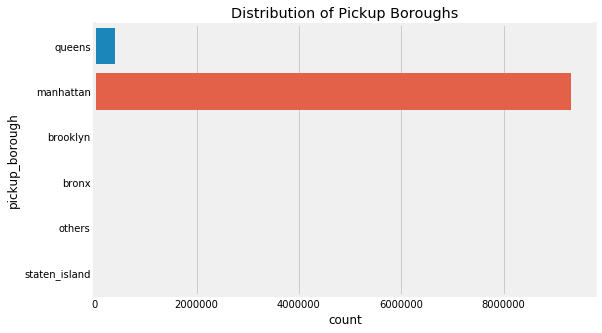

In [39]:
plt.figure(figsize=(8,5))
sns.countplot(y=train['pickup_borough'])
plt.title("Distribution of Pickup Boroughs")

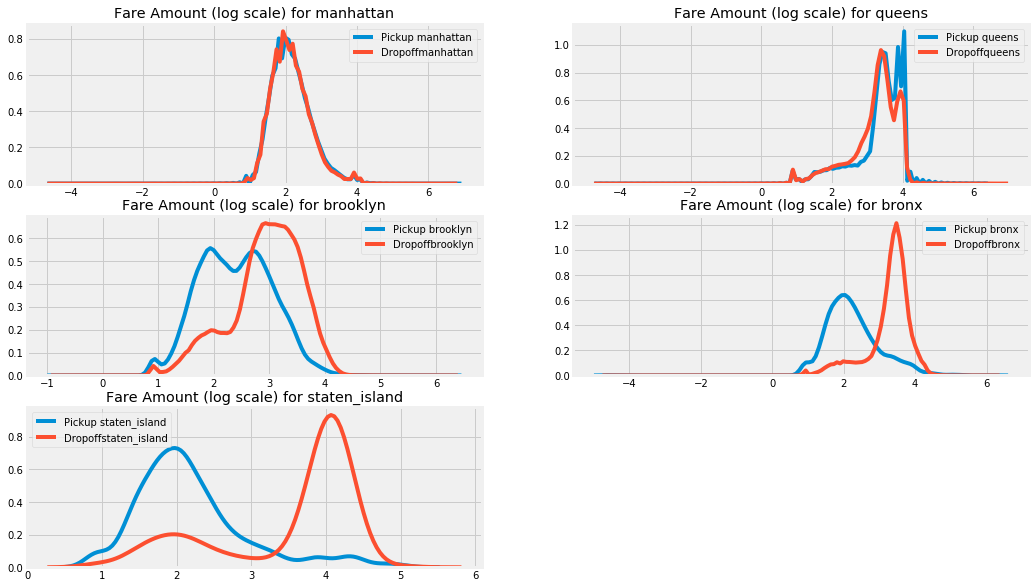

In [40]:
plt.figure(figsize=(16,10))
plt.title("Distribution of Fare Amount Across Buroughs")
i=1
for key in nyc_boroughs.keys():
    plt.subplot(3,2,i)
    sns.kdeplot(np.log(train.loc[train['pickup_borough']==key,'fare_amount'].values),label='Pickup '+ key)
    sns.kdeplot(np.log(train.loc[train['dropoff_borough']==key,'fare_amount'].values),label='Dropoff'+ key).set_title("Fare Amount (log scale) for "+key)
    
    i=i+1

There is a significant difference in pickups and dropoffs fare amount for each burough exceept Manhattan. We can see pickups from Queens is expensive compared to pickups from other Buroughs.Very high difference in pickup and dropoff prices for Staten Island.

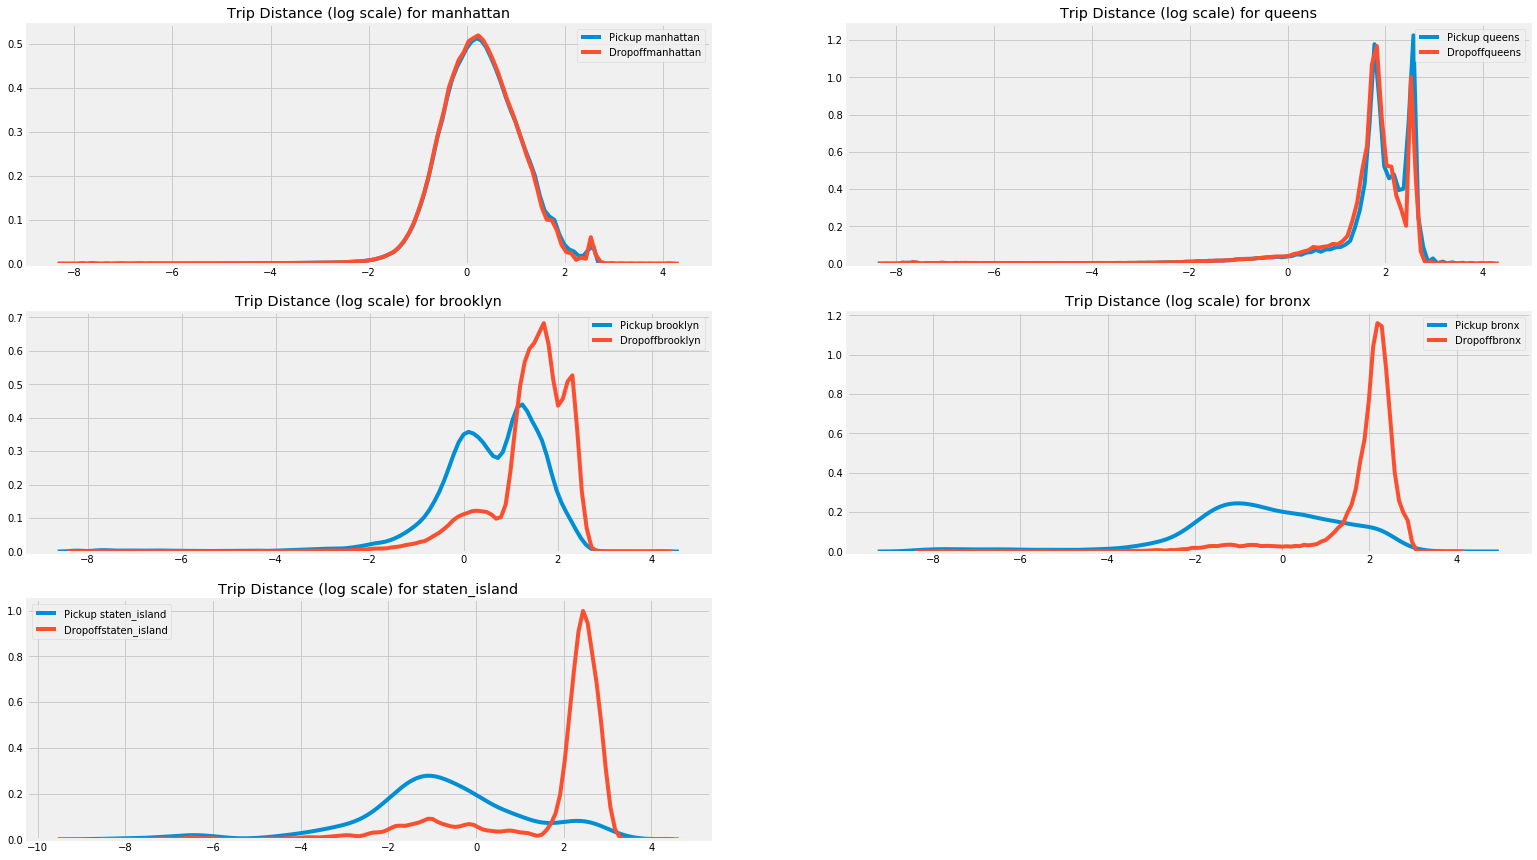

In [41]:
plt.figure(figsize=(24,15))
plt.title("Distribution of Trip Distances Across Buroughs")
i=1
for key in nyc_boroughs.keys():
    plt.subplot(3,2,i)
    sns.kdeplot(np.log(train.loc[train['pickup_borough']==key,'trip_distance'].values),label='Pickup '+ key)
    sns.kdeplot(np.log(train.loc[train['dropoff_borough']==key,'trip_distance'].values),label='Dropoff'+ key).set_title("Trip Distance (log scale) for "+key)
    i=i+1

Dropoffs to Bronx and Staten island are long trips. In Manhattan the pickup and dropoffs fare amount has similar distribution. Let us add a field, is_lower_manhattan as we had seen above that dropoffs to lower manhattan had higher trip distance but lower fare

In [42]:
lower_manhattan_boundary={'min_lng': -74.0194,
                          'min_lat':40.6997,
                          'max_lng':-73.9716,
                          'max_lat':40.7427}

def isLowerManhattan(lat,lng):
    if lat>=lower_manhattan_boundary['min_lat'] and lat<=lower_manhattan_boundary['max_lat'] and lng>=lower_manhattan_boundary['min_lng'] and lng<=lower_manhattan_boundary['max_lng']:
        return 1
    else:
        return 0

In [43]:
train['is_pickup_lower_manhattan']=train.apply(lambda row:isLowerManhattan(row['pickup_latitude'],row['pickup_longitude']),axis=1)
train['is_dropoff_lower_manhattan']=train.apply(lambda row:isLowerManhattan(row['dropoff_latitude'],row['dropoff_longitude']),axis=1)

In [44]:
manhattan=train.loc[(train['pickup_borough']=='manhattan') | (train['dropoff_borough']=='manhattan')]
manhattan.shape

(9630914, 30)

Text(0.5, 1.0, 'Distribution of Fare Amount - Manhattan vs Lower Manhattan')

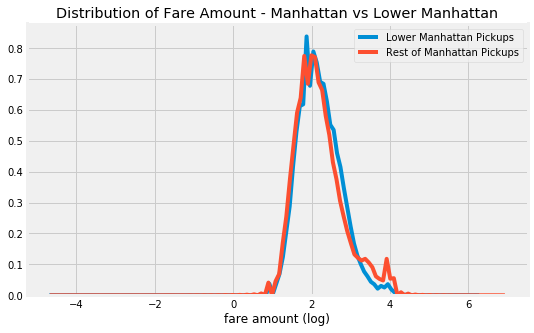

In [45]:
plt.figure(figsize=(8,5))
sns.kdeplot(np.log(manhattan.loc[manhattan['is_pickup_lower_manhattan']==1,'fare_amount'].values),label='Lower Manhattan Pickups')
sns.kdeplot(np.log(manhattan.loc[manhattan['is_pickup_lower_manhattan']==0,'fare_amount'].values),label='Rest of Manhattan Pickups')
plt.xlabel("fare amount (log)")
plt.title("Distribution of Fare Amount - Manhattan vs Lower Manhattan")

Text(0.5, 1.0, 'Distribution of Fare Amount - Manhattan vs Lower Manhattan')

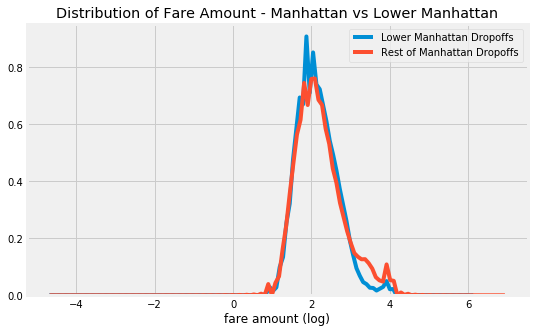

In [46]:
plt.figure(figsize=(8,5))
sns.kdeplot(np.log(manhattan.loc[manhattan['is_dropoff_lower_manhattan']==1,'fare_amount'].values),label='Lower Manhattan Dropoffs')
sns.kdeplot(np.log(manhattan.loc[manhattan['is_dropoff_lower_manhattan']==0,'fare_amount'].values),label='Rest of Manhattan Dropoffs')
plt.xlabel("fare amount (log)")
plt.title("Distribution of Fare Amount - Manhattan vs Lower Manhattan")

## Model

## Feature engineering
*  Now i'll do some feature engineering and process the data, i'm basically creating 3 kinds of features.
    *  **Time features**
        * Year, Month, Day, Hour, Weekday
        * Night (between 16h and 20h, from monday to friday)
        * Late night (between 20h and and 6h)
    * **Coordinate features**
        * Latitude difference (difference from pickup and dropout latitudes)
        * Longitude difference (difference from pickup and dropout longitudes)
    * **Distances features**
        * Euclidean (Euclidean distance from pickup and dropout)
        * Manhattan (Manhattan distance from pickup and dropout)
        * Manhattan distances from pickup location and downtown, JFK, EWR and LGR airports (see if the ride started at one of these locations).
        * Manhattan distances from dropout location and downtown, JFK, EWR and LGR airports (see if the ride ended at one of these locations).

In [47]:
def late_night (row):
    if (row['pickup_hour'] <= 6) or (row['pickup_hour'] >= 20):
        return 1
    else:
        return 0


def night (row):
    if ((row['pickup_hour'] <= 20) and (row['pickup_hour'] >= 16)) and (row['weekday'] < 5):
        return 1
    else:
        return 0
    
    
def manhattan(pickup_lat, pickup_long, dropoff_lat, dropoff_long):
    return np.abs(dropoff_lat - pickup_lat) + np.abs(dropoff_long - pickup_long)



def add_coordinate_features(df):
    lat1 = df['pickup_latitude']
    lat2 = df['dropoff_latitude']
    lon1 = df['pickup_longitude']
    lon2 = df['dropoff_longitude']
    
    # Add new features
    df['latdiff'] = (lat1 - lat2)
    df['londiff'] = (lon1 - lon2)

    return df


def add_distances_features(df):
    # Add distances from airpot and downtown
    ny = (-74.0063889, 40.7141667)
    jfk = (-73.7822222222, 40.6441666667)
    ewr = (-74.175, 40.69)
    lgr = (-73.87, 40.77)
    
    lat1 = df['pickup_latitude']
    lat2 = df['dropoff_latitude']
    lon1 = df['pickup_longitude']
    lon2 = df['dropoff_longitude']
    
    df['euclidean'] = (df['latdiff'] ** 2 + df['londiff'] ** 2) ** 0.5
    df['manhattan'] = manhattan(lat1, lon1, lat2, lon2)
    
    df['downtown_pickup_distance'] = manhattan(ny[1], ny[0], lat1, lon1)
    df['downtown_dropoff_distance'] = manhattan(ny[1], ny[0], lat2, lon2)
    df['jfk_pickup_distance'] = manhattan(jfk[1], jfk[0], lat1, lon1)
    df['jfk_dropoff_distance'] = manhattan(jfk[1], jfk[0], lat2, lon2)
    df['ewr_pickup_distance'] = manhattan(ewr[1], ewr[0], lat1, lon1)
    df['ewr_dropoff_distance'] = manhattan(ewr[1], ewr[0], lat2, lon2)
    df['lgr_pickup_distance'] = manhattan(lgr[1], lgr[0], lat1, lon1)
    df['lgr_dropoff_distance'] = manhattan(lgr[1], lgr[0], lat2, lon2)
    
    return df

In [48]:
### Auxiliar functions
def output_submission(raw_test, prediction, id_column, prediction_column, file_name):
    df = pd.DataFrame(prediction, columns=[prediction_column])
    df[id_column] = raw_test[id_column]
    df[[id_column, prediction_column]].to_csv((file_name), index=False)
    print('Output complete')
    
    
def plot_loss_accuracy(history):
    plt.figure(figsize=(20,10))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()

In [49]:
### Model parameters
BATCH_SIZE = 256
EPOCHS = 50
LEARNING_RATE = 0.001

**Clean & process data**\
Add the feature "night", "Late night".

In [50]:
train['night'] = train.apply (lambda x: night(x), axis=1)
train['late_night'] = train.apply (lambda x: late_night(x), axis=1)


add_coordinate_features(train)
add_coordinate_features(test)

train = add_distances_features(train)
test = add_distances_features(test)

In [51]:
# Drop unnecessary columns
dropped_columns = ['pickup_longitude', 'pickup_latitude', 
                   'dropoff_longitude', 'dropoff_latitude','pickup_datetime','key']
train_clean = train.drop(dropped_columns+['pickup_date','pickup_day_of_week','pickup_borough','dropoff_borough'], axis=1)
test_clean = test.drop(dropped_columns + ['key', 'passenger_count'], axis=1)



In [52]:
print(train_clean.columns)
print(test_clean.columns)

Index(['fare_amount', 'passenger_count', 'pickup_day', 'pickup_hour',
       'pickup_month', 'pickup_year', 'weekday', 'pickup_latitude_round3',
       'pickup_longitude_round3', 'dropoff_latitude_round3',
       'dropoff_longitude_round3', 'is_pickup_JFK', 'is_dropoff_JFK',
       'is_pickup_EWR', 'is_dropoff_EWR', 'is_pickup_la_guardia',
       'is_dropoff_la_guardia', 'trip_distance', 'is_pickup_lower_manhattan',
       'is_dropoff_lower_manhattan', 'night', 'late_night', 'latdiff',
       'londiff', 'euclidean', 'manhattan', 'downtown_pickup_distance',
       'downtown_dropoff_distance', 'jfk_pickup_distance',
       'jfk_dropoff_distance', 'ewr_pickup_distance', 'ewr_dropoff_distance',
       'lgr_pickup_distance', 'lgr_dropoff_distance'],
      dtype='object')
Index(['latdiff', 'londiff', 'euclidean', 'manhattan',
       'downtown_pickup_distance', 'downtown_dropoff_distance',
       'jfk_pickup_distance', 'jfk_dropoff_distance', 'ewr_pickup_distance',
       'ewr_dropoff_distanc

In [53]:
train_clean = train_clean[['latdiff', 'londiff', 'euclidean', 'manhattan',
       'downtown_pickup_distance', 'downtown_dropoff_distance',
       'jfk_pickup_distance', 'jfk_dropoff_distance', 'ewr_pickup_distance',
       'ewr_dropoff_distance', 'lgr_pickup_distance', 'lgr_dropoff_distance']+['fare_amount']]

In [54]:
train_df, validation_df = train_test_split(train_clean, test_size=0.20, random_state=1)

# Get labels
train_labels = train_df['fare_amount'].values
validation_labels = validation_df['fare_amount'].values
train_df = train_df.drop(['fare_amount'], axis=1)
validation_df = validation_df.drop(['fare_amount'], axis=1)

# Scale data
scaler = preprocessing.MinMaxScaler()
train_df_scaled = scaler.fit_transform(train_df)
validation_df_scaled = scaler.transform(validation_df)
test_scaled = scaler.transform(test_clean)

### Keras Deep learning Model

**Define model and parameters**\
Currently i'm using Adam optimizer, it seems to be the better default optimizer for DNN.\
Tensorflow estimator API accepts train and evaluation spec (Specifications), that are classes with some of the information needed for the model training and evaluation, like the input function, labels and many more.

In [55]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping
from keras import optimizers
from keras import regularizers
import tensorflow as tf
print(tf.__version__)
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=train_df_scaled.shape[1], activity_regularizer=regularizers.l1(0.01)))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(8, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1))

#adam = optimizers.adam(lr=LEARNING_RATE)
model.compile(loss='mse', optimizer=tf.optimizers.Adam(lr=LEARNING_RATE), metrics=['mse'])

#print('Dataset size: %s' % DATASET_SIZE)
print('Epochs: %s' % EPOCHS)
print('Learning rate: %s' % LEARNING_RATE)
print('Batch size: %s' % BATCH_SIZE)
print('Input dimension: %s' % train_df_scaled.shape[1])
print('Features used: %s' % train_df.columns)

2.3.1
Epochs: 50
Learning rate: 0.001
Batch size: 256
Input dimension: 12
Features used: Index(['latdiff', 'londiff', 'euclidean', 'manhattan',
       'downtown_pickup_distance', 'downtown_dropoff_distance',
       'jfk_pickup_distance', 'jfk_dropoff_distance', 'ewr_pickup_distance',
       'ewr_dropoff_distance', 'lgr_pickup_distance', 'lgr_dropoff_distance'],
      dtype='object')


In [56]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               3328      
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
batch_normalization_2 (Batch (None, 64)                256       
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2

Epoch 1/50
30578/30578 [==============================] - 91s 3ms/step - loss: 20.4694 - mse: 20.4323 - val_loss: 19.1304 - val_mse: 19.0998
Epoch 2/50
30578/30578 [==============================] - 87s 3ms/step - loss: 17.8229 - mse: 17.7906 - val_loss: 35.9916 - val_mse: 35.9591
Epoch 3/50
30578/30578 [==============================] - 88s 3ms/step - loss: 17.5681 - mse: 17.5384 - val_loss: 22.8867 - val_mse: 22.8559
Epoch 4/50
30578/30578 [==============================] - 87s 3ms/step - loss: 17.4114 - mse: 17.3785 - val_loss: 19.2267 - val_mse: 19.1921
Epoch 5/50
30578/30578 [==============================] - 87s 3ms/step - loss: 17.2726 - mse: 17.2402 - val_loss: 18.2582 - val_mse: 18.2284
Epoch 6/50
30578/30578 [==============================] - 87s 3ms/step - loss: 17.1777 - mse: 17.1470 - val_loss: 17.6007 - val_mse: 17.5709
Epoch 7/50
30578/30578 [==============================] - 87s 3ms/step - loss: 17.0905 - mse: 17.0607 - val_loss: 18.9726 - val_mse: 18.9436
Epoch 8/50
30

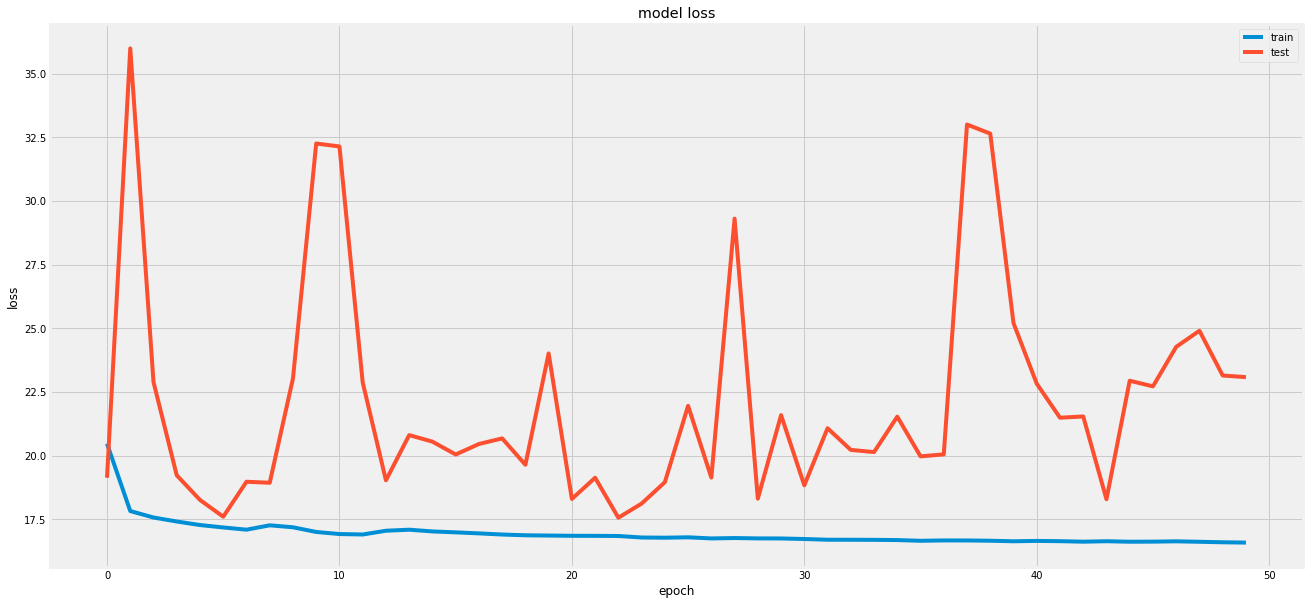

78/78 [==============================] - 0s 699us/step
Output complete


In [57]:
history = model.fit(x=train_df_scaled, y=train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS, 
                    verbose=1, validation_data=(validation_df_scaled, validation_labels), shuffle=True)
plot_loss_accuracy(history)
prediction = model.predict(test_scaled, batch_size=128, verbose=1)
output_submission(test, prediction, 'key', 'fare_amount', "result_deep_learning.csv")

### Conclusion
This model fits well but the performance is not the best. The reason might be I just select a part of database because my laptop is not able to implement deep learning network with 55M rows data.

Here is the submission result of output from Keras Model

![avatar](Submission.png)

**Reference**\
Citation:https://www.kaggle.com/aiswaryaramachandran/eda-and-feature-engineering

---
**License**
This project is licensed under [MIT License](https://raw.githubusercontent.com/22557i/INFO7390AdvancedDataScience/master/Assignment2/license.txt),  
all credits to Hao Wu.